In [23]:
import pandas as pd
import thinkplot
import numpy as np
import re
import thinkstats2
import matplotlib.pyplot as plt

## Preparing the data

Read in cleaned time series data (reference data cleaning notebook for detailed data processing methods)

In [24]:
df = pd.read_excel('Data/weeklyincome_occupation_gender_combined_clean_all.xlsx')
df = df.set_index('Occupation')
df.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 175.16842105263163, 173.70345217883425...","[886.0, 880.9639889196677, 870.6100735710244, ...","[789.0, 788.7700831024931, 783.7583474816072, ...","[973.0, 963.9385041551247, 957.4617996604414, ..."
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 399.50692520775624, 411.23769100169784...","[1246.0, 1253.8371191135736, 1243.130730050933...","[1078.0, 1077.64432132964, 1074.6593095642331,...","[1468.0, 1477.1512465373962, 1485.897000565931..."
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 401.5556786703603, 410.19128466327106,...","[1355.0, 1359.3479224376733, 1343.585738539898...","[1168.0, 1161.643213296399, 1150.0005659309563...","[1537.0, 1563.1988919667592, 1560.191850594227..."
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 409.75069252077583, 409.1448783248445,...","[1429.0, 1425.9324099722994, 1433.576683644595...","[1236.0, 1201.5939058171746, 1201.274476513865...","[1585.0, 1611.3445983379504, 1610.419354838709..."
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 507.06648199446, 568.1986417657045, 43...","[2291.0, 2351.9689750692523, 2409.873797396717...","[1736.0, 1966.8033240997233, 1963.058290888511...","[2488.0, 2473.8698060941833, 2531.256932654216..."


Find changes in percent female, total weekly pay, and pay gap and add to `df`. Also find percent increases and decreases for percent female change, total weekly pay change, and pay gap change. If the change is negative, that means the value from 2018 is lower than the value from 2003. We can determine the percent **decrease** by dividing the change by the value from 2003. If the change is positive, that means that the value from 2018 is higher than the value from 2003. We can determine the percent **increase** by dividing the change by the value from 2003. Finding relative changes allows us to compare absolute changes between different occupations by adjusting for occupation-based income differences (i.e. doctors tend to make more than janitors).  

First create new columns for relative and absolute change.

In [25]:
df['Relative Percent Female Change (%)'] = pd.Series()
df['Relative Total Weekly Pay Change (%)'] = pd.Series()
df['Relative Pay Gap Change (%)'] = pd.Series()
df['Percent Female Change (%)'] = pd.Series()
df['Total Weekly Pay Change ($)'] = pd.Series()
df['Pay Gap Change ($)'] = pd.Series()

For each occupation, extract the percent female, total weekly pay, and pay gap data arrays. Since the arrays are sorted from 2018 to 2003, calculate the absolute changes by subtracting the first element of each array by the last element. Find the relative changes (percent increase/decrease) by dividing the absolute changes with the data from 2003. Lastly, update `df` with the calculated values. 

In [26]:
for occ in df.index:
    temp_percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))
    temp_total_pay = np.asarray(eval(df.loc[occ]['Total Weekly Pay']))
    temp_pay_gap = np.asarray(eval(df.loc[occ]['Pay Gap']))
    
    temp_percent_female_change = temp_percent_female[0]-temp_percent_female[-1]
    temp_total_pay_change = temp_total_pay[0]-temp_total_pay[-1]
    temp_pay_gap_change = temp_pay_gap[0]-temp_pay_gap[-1]
    temp_percent_female_change_percent = (temp_percent_female_change/temp_percent_female[-1])*100
    temp_total_pay_change_percent = (temp_total_pay_change/temp_total_pay[-1])*100
    temp_pay_gap_change_percent = (temp_pay_gap_change/temp_pay_gap[-1])*100
    
    df.at[occ, 'Percent Female Change (%)'] = temp_percent_female_change
    df.at[occ, 'Total Weekly Pay Change ($)'] = temp_total_pay_change
    df.at[occ, 'Pay Gap Change ($)'] = temp_pay_gap_change
    df.at[occ, 'Relative Percent Female Change (%)'] = temp_percent_female_change_percent
    df.at[occ, 'Relative Total Weekly Pay Change (%)'] = temp_total_pay_change_percent
    df.at[occ, 'Relative Pay Gap Change (%)'] = temp_pay_gap_change_percent

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


There is a divide by zero warning, which occurs when finding the `Relative Pay Gap Change (%)` for the occupation, Office Clerks General. In 2003, both men and women had a weekly median income of \\$502, which makes the pay gap \\$0. The absolute pay gap change divided by 0 results in `-inf`.  

Display the changes (absolute and relative) for the first five occupations

In [27]:
df.iloc[:5,-6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Total fulltime wage and salary workers,1.262321,4.414418,-5.984335,0.554706,37.458179,-11.712065
Management professional and related occupations,2.247015,2.639106,-5.329091,1.131191,32.037750,-21.953368
Management business and financial operations occupations,4.081821,3.023036,-21.623411,1.815457,39.760178,-101.803849
Management occupations,8.131871,2.064575,-21.051962,3.194061,28.905996,-93.062916
Chief executives,19.173460,7.442492,11.452383,4.498389,158.696521,77.272391


Optional: output the data to an Excel file

In [28]:
#df.to_excel('Data/weeklyincome_occupation_gender_combined_clean_all_calculations.xlsx')

## Exploring the data

Before we delve into the data for each occupation, we look at how percent female, total weekly pay, and pay gap change for all occupations. This data is represented by the occupation `Total fulltime wage and salary workers`.

In [29]:
df.loc['Total fulltime wage and salary workers'][-6:]

Relative Percent Female Change (%)       1.26232
Relative Total Weekly Pay Change (%)     4.41442
Relative Pay Gap Change (%)             -5.98433
Percent Female Change (%)               0.554706
Total Weekly Pay Change ($)              37.4582
Pay Gap Change ($)                      -11.7121
Name: Total fulltime wage and salary workers, dtype: object

In general the pay gap decreased by 6.0%, total weekly pay increased by 4.4%, and the proportion of women in the work force increased by 1.3%. A lower pay gap means that in 2018 the difference between the median weekly male income and median weekly female income is lower than it was in 2003. We can create a two-scale plot of pay gap and percent female versus year. (We need to flip the data arrays since they are ordered in reverse chronological order.) 

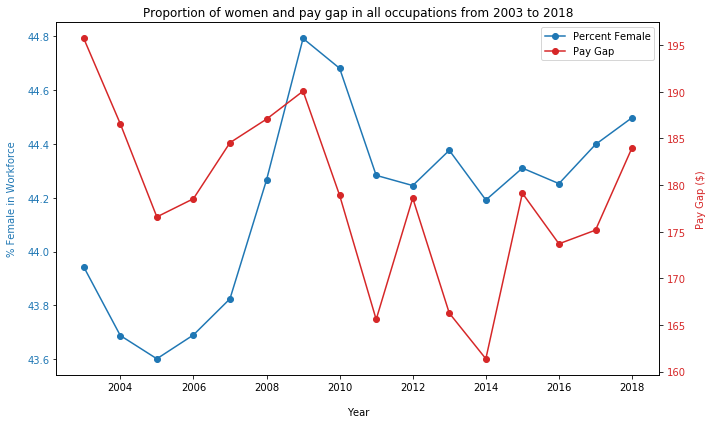

In [31]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Total fulltime wage and salary workers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Total fulltime wage and salary workers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap in all occupations from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The blue vertical axis and line corresponds to percent female in the workforce, while the red vertical axis and line corresponds to pay gap. Percent female increases from 2003 to 2018, especially between 2005 and 2009. In 2009, percent female peaks before stabilizing to around 44.3%. In recent years (2016-2018), percent female seems to be on the rise. In general, percent female does not change drastically with a scale from 43.6% to 44.8%.  

On the other hand, pay gap fluctuates more widely in the same time range (scale from \\$160 to \\$195), especially between 2011 and 2015. Compared to 2003, the pay gap decreased by around \\$10. However, compared to 2016, the pay gap increased by around \\$10. 

`df` contains information for almost 100 occupations. To get a better understanding how percent female, total weekly pay, and pay gap compares for different occupations, we split the data into sub-sections corresponding to positive/negative values of percent female change, total weekly pay change, and pay gap change. Analysis is first done on occupations with positive values of percent female change and then on occupations with negative values.    

### Occupations with positive percent female change

First we create another `DataFrame` that contains all of the occupations with a positive percent female change.

In [32]:
df_percent_female_pos = df[df['Percent Female Change (%)'] > 0]
print('Number of occupations:', df_percent_female_pos.shape[0])
df_percent_female_pos.iloc[:5,-6:]

Number of occupations: 59


,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Total fulltime wage and salary workers,1.262321,4.414418,-5.984335,0.554706,37.458179,-11.712065
Management professional and related occupations,2.247015,2.639106,-5.329091,1.131191,32.037750,-21.953368
Management business and financial operations occupations,4.081821,3.023036,-21.623411,1.815457,39.760178,-101.803849
Management occupations,8.131871,2.064575,-21.051962,3.194061,28.905996,-93.062916
Chief executives,19.173460,7.442492,11.452383,4.498389,158.696521,77.272391


There seems to be quite a lot. Let's order them in descending order by relative percent female change and display the first 10

In [33]:
df_percent_female_pos_sorted = df_percent_female_pos.sort_values(by=['Relative Percent Female Change (%)'], ascending=False)
df_percent_female_pos_sorted.iloc[:10,-6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Driversales workers and truck drivers,43.567904,-1.002738,49.454250,1.685315,-8.275352,89.342709
Physicians and surgeons,35.336582,4.061289,-11.215679,11.113388,78.094745,-105.607698
Pharmacists,32.257733,2.451434,64.723935,15.301745,49.554404,149.703923
Laborers and freight stock and material movers hand,31.627960,-5.045015,-3.795745,4.790595,-32.037750,-3.116950
Lawyers,27.998369,-8.807359,56.064417,8.821404,-188.040711,158.065137
Postal service mail carriers,27.660819,-12.451824,652.155378,8.877628,-132.414508,151.733531
Transportation and material moving occupations,27.390746,-3.186858,-0.800196,3.526543,-22.680237,-1.500370
Construction and extraction occupations,26.147258,-1.439482,-83.299081,0.617238,-11.800888,-119.704663
Police and sheriffs patrol officers,25.768434,4.435396,490.152681,2.983258,46.377498,261.623982


We can plot the first five occupations with percent female against year

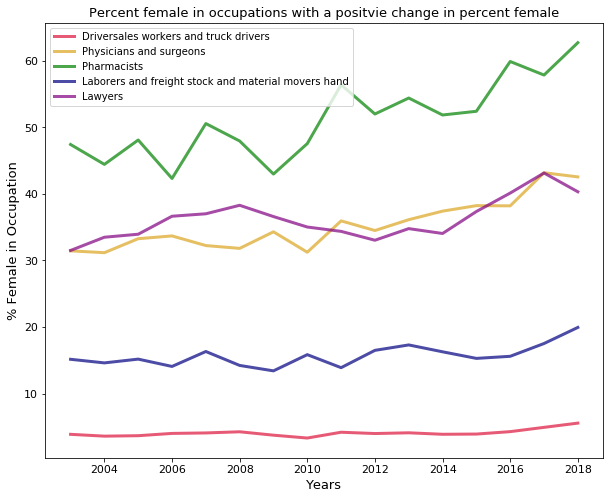

<Figure size 576x432 with 0 Axes>

In [52]:
fig, ax = plt.subplots(figsize=(10,8))

years = range(2003, 2019)
colors = ['crimson', 'goldenrod', 'green', 'navy', 'purple']

index = 0
for occ in df_percent_female_pos_sorted.index[:5]:
    percent_female = np.asarray(eval(df_percent_female_pos_sorted.loc[occ]['Percent Female']))[::-1]
    thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    index += 1
    
thinkplot.Config(xlabel='Years', 
                 ylabel='% Female in Occupation', 
                 title='Percent female in occupations with a positive change in percent female')
thinkplot.set_font_size(13, 13, 11, 11)

thinkplot.Show()

- shows importance of finding relative change
- a divide between top three and bottom two (also differentiated by high income and low income jobs)
- physicians and lawyers similar 
- pharmacists (break 50 mark)

### Occupations with positive percent female change but negative total weekly pay change

We create another `DataFrame` that contains all of the occupations with a positive percent female change and negative total weekly pay change. This subset can be used to provide evidence for the observation that when women become more represented in a job, the pay for that job tends to go down.  

In [42]:
df_percent_female_pos_total_pay_neg = df_percent_female_pos[df_percent_female_pos['Total Weekly Pay Change ($)'] < 0]
print('Number of occupations:', df_percent_female_pos_total_pay_neg.shape[0])
df_percent_female_pos_total_pay_neg.iloc[:5,-6:]

Number of occupations: 24


,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
General and operations managers,15.327461,-13.941015,3.152738,4.005515,-216.747594,8.802369
Purchasing managers,15.259875,-10.183571,-67.418460,5.904118,-154.426351,-417.982976
Food service managers,14.757131,-8.779604,28.165867,6.328651,-77.863064,47.028868
Personal financial advisors,16.817633,-1.620670,-27.264095,5.077021,-24.265729,-164.928201
Social workers,5.265425,-4.232174,-10.858843,4.058765,-40.082161,-7.430792


There are a few. Let's order them in ascending order by `Relative Total Weekly Pay Change (%)` and display the first 10

In [43]:
df_percent_female_pos_total_pay_neg_sorted = df_percent_female_pos_total_pay_neg.sort_values(by=['Relative Total Weekly Pay Change (%)'], ascending=True)
df_percent_female_pos_total_pay_neg_sorted.iloc[:10,-6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Insurance sales agents,16.301977,-15.526053,-53.056723,7.850689,-157.881569,-270.125093
General and operations managers,15.327461,-13.941015,3.152738,4.005515,-216.747594,8.802369
Bailiffs correctional officers and jailers,4.635319,-13.807059,-19.626825,1.180577,-118.859363,-40.292376
Clinical laboratory technologists and technicians,2.822250,-13.117970,-193.362779,2.034927,-134.830496,-190.540340
Postal service mail carriers,27.660819,-12.451824,652.155378,8.877628,-132.414508,151.733531
Purchasing managers,15.259875,-10.183571,-67.418460,5.904118,-154.426351,-417.982976
Lawyers,27.998369,-8.807359,56.064417,8.821404,-188.040711,158.065137
Food service managers,14.757131,-8.779604,28.165867,6.328651,-77.863064,47.028868
Laborers and freight stock and material movers hand,31.627960,-5.045015,-3.795745,4.790595,-32.037750,-3.116950


Before visualizing total weekly pay, we pick a few occupations from the above data table with percent female values that increase over time. 

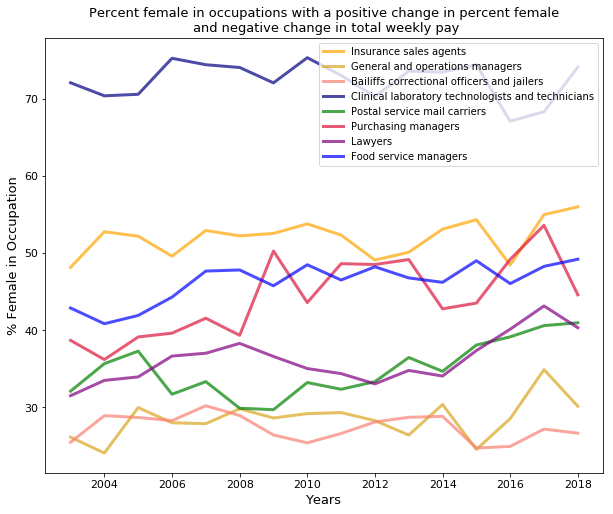

<Figure size 576x432 with 0 Axes>

In [61]:
fig, ax = plt.subplots(figsize=(10,8))

years = range(2003, 2019)
colors = ['orange', 'goldenrod', 'salmon', 'navy', 'green', 'crimson', 'purple', 'blue', 'black', 'cyan']

index = 0
for occ in df_percent_female_pos_total_pay_neg_sorted.index[:8]:
    percent_female = np.asarray(eval(df_percent_female_pos_total_pay_neg_sorted.loc[occ]['Percent Female']))[::-1]
    thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    index += 1
    
thinkplot.Config(xlabel='Years', 
                 ylabel='% Female in Occupation', 
                 title='Percent female in occupations with a positive change in percent female\n and negative change in total weekly pay')
thinkplot.set_font_size(13, 13, 11, 11)

thinkplot.Show()

After plotting, the first 8 occupations, we identify four occupations with a positive relationship between percent female and time:
- postal service mail carriers
- purchasing managers
- lawyers
- food service managers

The percent females for these occupations are all in the range of 30% to 50%.

For each of the 4 occupations, we make a two-scale plot of total weekly pay and percent female versus year. 

#### Postal service mail carriers

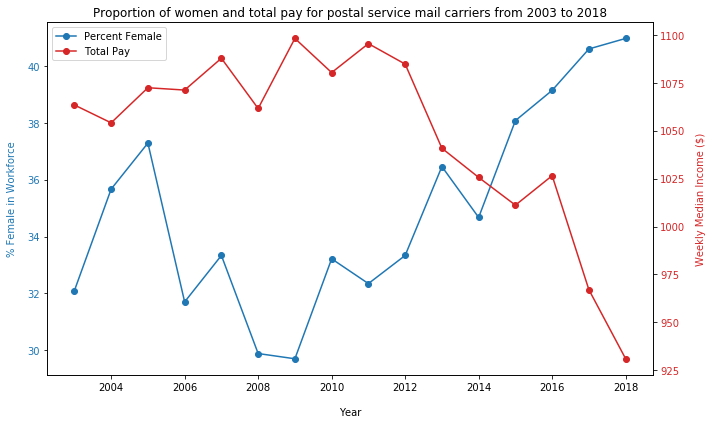

In [65]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Postal service mail carriers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_total_pay = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_total_pay.set_ylabel('Weekly Median Income ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
total_pay = np.asarray(eval(df_percent_female_pos_total_pay_neg_sorted.loc['Postal service mail carriers']['Total Weekly Pay']))[::-1]
line_total_pay = plt.plot(years, total_pay, label='Total Pay', color=color, marker='o')
ax_total_pay.tick_params(axis='y', labelcolor=color)
ax_total_pay.yaxis.labelpad = 10

ax_total_pay.title.set_text('Proportion of women and total pay for postal service mail carriers from 2003 to 2018')

lines = line_percent_female + line_total_pay
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**TALK!!**

#### Purchasing managers

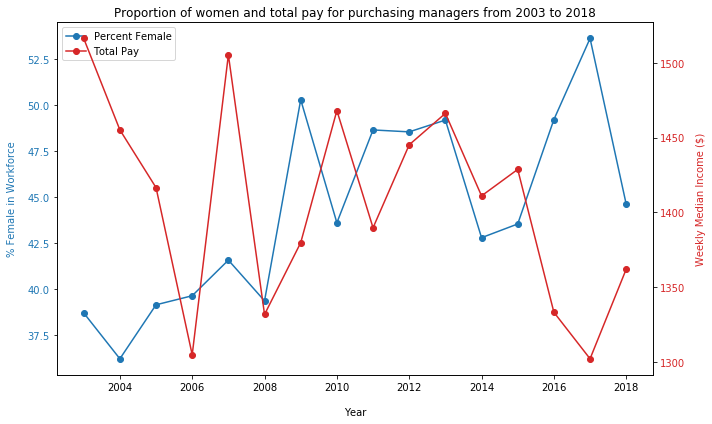

In [67]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Purchasing managers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_total_pay = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_total_pay.set_ylabel('Weekly Median Income ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
total_pay = np.asarray(eval(df_percent_female_pos_total_pay_neg_sorted.loc['Purchasing managers']['Total Weekly Pay']))[::-1]
line_total_pay = plt.plot(years, total_pay, label='Total Pay', color=color, marker='o')
ax_total_pay.tick_params(axis='y', labelcolor=color)
ax_total_pay.yaxis.labelpad = 10

ax_total_pay.title.set_text('Proportion of women and total pay for purchasing managers from 2003 to 2018')

lines = line_percent_female + line_total_pay
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**TALK!!**

#### Lawyers

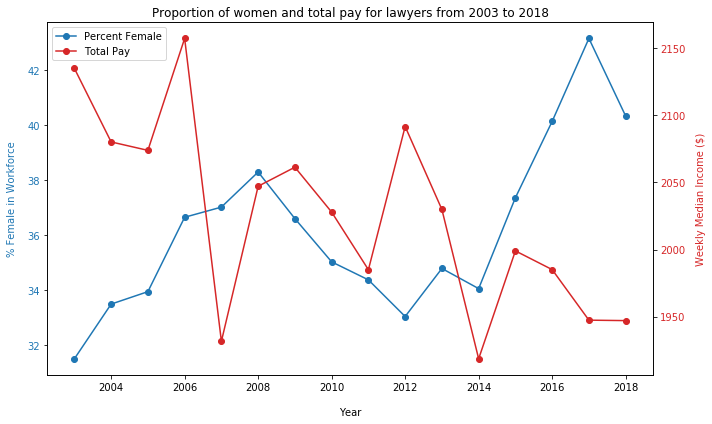

In [68]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Lawyers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_total_pay = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_total_pay.set_ylabel('Weekly Median Income ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
total_pay = np.asarray(eval(df_percent_female_pos_total_pay_neg_sorted.loc['Lawyers']['Total Weekly Pay']))[::-1]
line_total_pay = plt.plot(years, total_pay, label='Total Pay', color=color, marker='o')
ax_total_pay.tick_params(axis='y', labelcolor=color)
ax_total_pay.yaxis.labelpad = 10

ax_total_pay.title.set_text('Proportion of women and total pay for lawyers from 2003 to 2018')

lines = line_percent_female + line_total_pay
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**TALK!!**

#### Food service managers

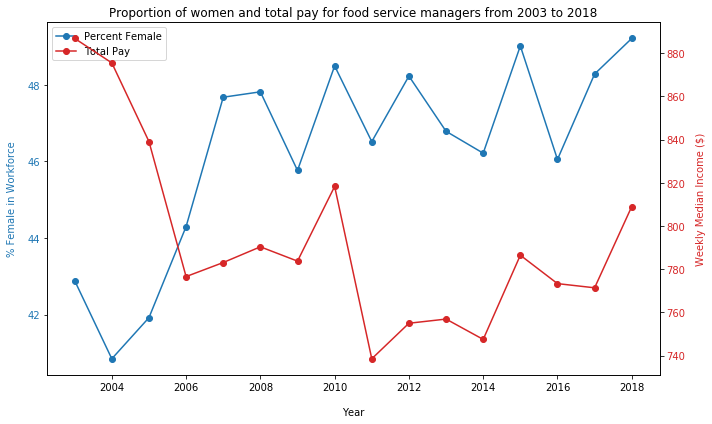

In [69]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Food service managers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_total_pay = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_total_pay.set_ylabel('Weekly Median Income ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
total_pay = np.asarray(eval(df_percent_female_pos_total_pay_neg_sorted.loc['Food service managers']['Total Weekly Pay']))[::-1]
line_total_pay = plt.plot(years, total_pay, label='Total Pay', color=color, marker='o')
ax_total_pay.tick_params(axis='y', labelcolor=color)
ax_total_pay.yaxis.labelpad = 10

ax_total_pay.title.set_text('Proportion of women and total pay for food service managers from 2003 to 2018')

lines = line_percent_female + line_total_pay
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**TALK!!**

**connect to observation that as more women enter, total pay decrease**

### Occupations with positive percent female change and positive pay gap change

We create another `DataFrame` that contains all of the occupations with a positive percent female change and positive pay gap change. This subset can be used to provide evidence for the observation that as women become more represented in a job, the difference in pay between men and women increases.  

In [74]:
df_percent_female_pos_pay_gap_pos = df_percent_female_pos[df_percent_female_pos['Pay Gap Change ($)'] > 0]
print('Number of occupations:', df_percent_female_pos_pay_gap_pos.shape[0])
df_percent_female_pos_pay_gap_pos.iloc[:5,-6:]

Number of occupations: 26


,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Chief executives,19.173460,7.442492,11.452383,4.498389,158.696521,77.272391
General and operations managers,15.327461,-13.941015,3.152738,4.005515,-216.747594,8.802369
Food service managers,14.757131,-8.779604,28.165867,6.328651,-77.863064,47.028868
Medical and health services managers,7.607290,4.338401,49.130646,5.211725,58.544782,131.119911
Social and community service managers,9.445825,5.798099,161.353330,5.967711,62.530718,172.247964


There are a few. Let's order them in descending order by `Relative Pay Gap Change (%)` and display the first 10 occupations

In [75]:
df_percent_female_pos_pay_gap_pos_sorted = df_percent_female_pos_pay_gap_pos.sort_values(by=['Relative Pay Gap Change (%)'], ascending=False)
df_percent_female_pos_pay_gap_pos_sorted.iloc[:10, -6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Postal service mail carriers,27.660819,-12.451824,652.155378,8.877628,-132.414508,151.733531
Police and sheriffs patrol officers,25.768434,4.435396,490.152681,2.983258,46.377498,261.623982
Social and community service managers,9.445825,5.798099,161.353330,5.967711,62.530718,172.247964
Dispatchers,11.074380,3.831374,140.760181,5.982143,28.892672,117.514434
Counselors,8.824034,3.236633,101.486471,5.819742,29.501850,45.835677
Pharmacists,32.257733,2.451434,64.723935,15.301745,49.554404,149.703923
Lawyers,27.998369,-8.807359,56.064417,8.821404,-188.040711,158.065137
Driversales workers and truck drivers,43.567904,-1.002738,49.454250,1.685315,-8.275352,89.342709
Medical and health services managers,7.607290,4.338401,49.130646,5.211725,58.544782,131.119911


Like we did above, before visualizing pay gap, we pick a few occupations from the above data table with percent female values that increase over time.

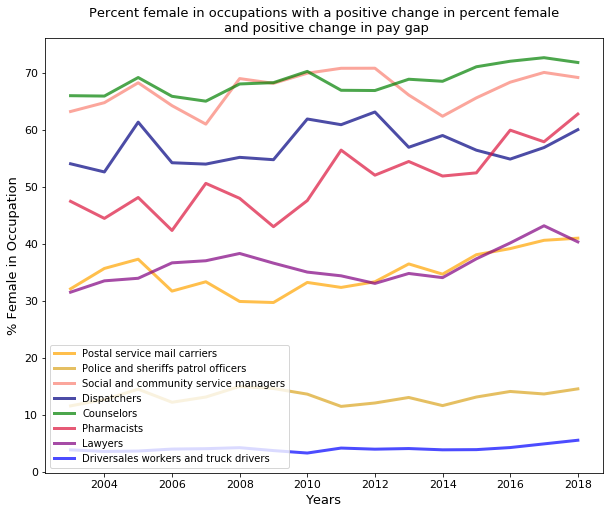

<Figure size 576x432 with 0 Axes>

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

years = range(2003, 2019)
colors = ['orange', 'goldenrod', 'salmon', 'navy', 'green', 'crimson', 'purple', 'blue', 'black', 'cyan']

index = 0
for occ in df_percent_female_pos_pay_gap_pos_sorted.index[:8]:
    percent_female = np.asarray(eval(df_percent_female_pos_pay_gap_pos_sorted.loc[occ]['Percent Female']))[::-1]
    thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    index += 1
    
thinkplot.Config(xlabel='Years', 
                 ylabel='% Female in Occupation', 
                 title='Percent female in occupations with a positive change in percent female\n and positive change in pay gap')
thinkplot.set_font_size(13, 13, 11, 11)

thinkplot.Show()

After plotting, the first 8 occupations, we identify ?? occupations with a positive relationship between percent female and time:
- postal service mail carriers
- social and community service managers
- dispatchers
- counselors
- pharmacists
- lawyers

The percent females for these occupations are all in the range of 30% to 70%.

For each of the ?? occupations, we make a two-scale plot of pay gap and percent female versus year. 

#### Postal service mail carriers

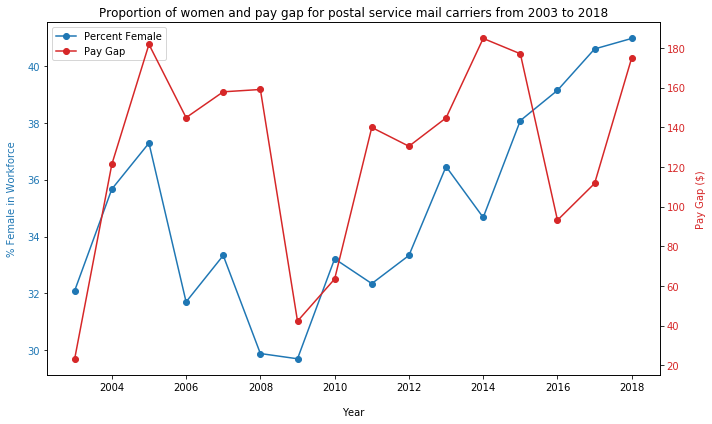

In [79]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Postal service mail carriers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Postal service mail carriers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for postal service mail carriers from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Social and community service managers

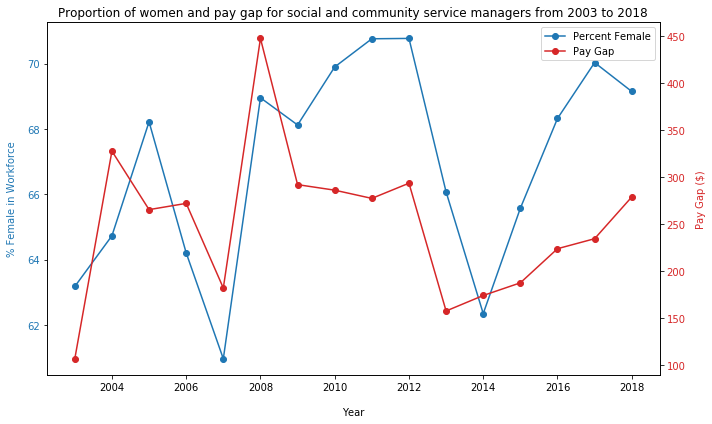

In [80]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Social and community service managers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Social and community service managers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for social and community service managers from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Dispatchers

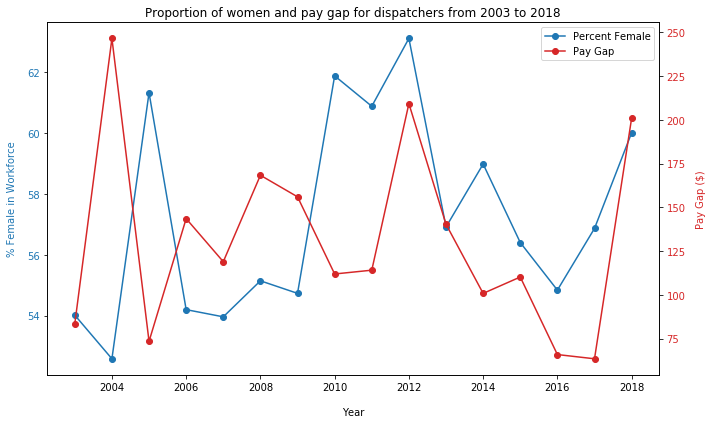

In [81]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Dispatchers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Dispatchers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for dispatchers from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Counselors

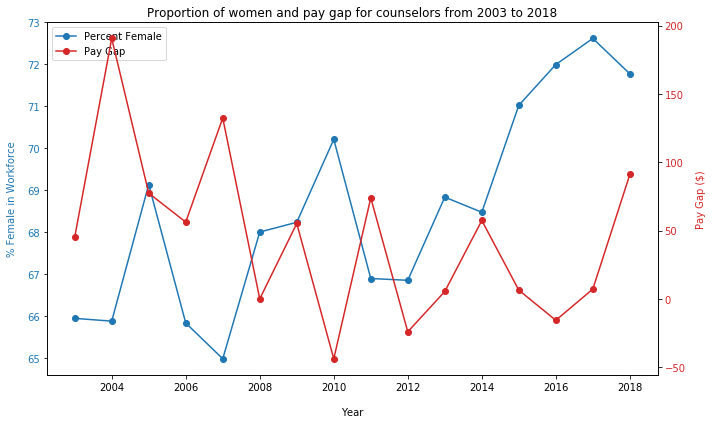

In [82]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Counselors']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Counselors']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for counselors from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Pharmacists

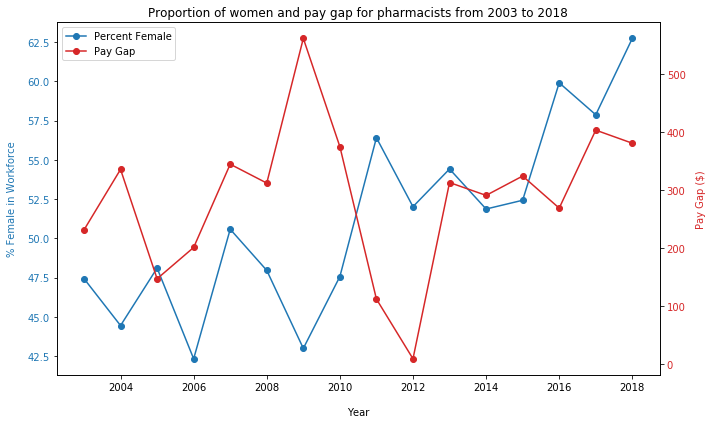

In [83]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Pharmacists']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Pharmacists']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for pharmacists from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Lawyers

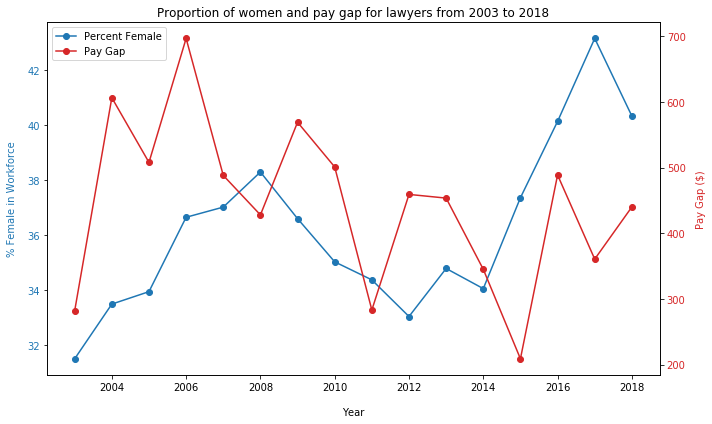

In [84]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Lawyers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Lawyers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for lawyers from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Occupations with positive percent female change and negative pay gap change

Let's look at some improvements that have been made regarding equal pay! We create another `DataFrame` that contains all of the occupations with a positive percent female change and negative pay gap change. This subset can be used to provide evidence for the observation that as women become more represented in a job, the difference in pay between men and women decreases (a win-win situation).  

In [87]:
df_percent_female_pos_pay_gap_neg = df_percent_female_pos[df_percent_female_pos['Pay Gap Change ($)'] < 0]
print('Number of occupations:', df_percent_female_pos_pay_gap_neg.shape[0])
df_percent_female_pos_pay_gap_neg.iloc[:5, -6:]

Number of occupations: 33


,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Total fulltime wage and salary workers,1.262321,4.414418,-5.984335,0.554706,37.458179,-11.712065
Management professional and related occupations,2.247015,2.639106,-5.329091,1.131191,32.037750,-21.953368
Management business and financial operations occupations,4.081821,3.023036,-21.623411,1.815457,39.760178,-101.803849
Management occupations,8.131871,2.064575,-21.051962,3.194061,28.905996,-93.062916
Marketing and sales managers,22.960120,1.592938,-2.445243,8.667445,24.569948,-12.282013


There are a few. Let's order them in ascending order by `Relative Pay Gap Change (%)`.

In [88]:
df_percent_female_pos_pay_gap_neg_sorted = df_percent_female_pos_pay_gap_neg.sort_values(by=['Relative Pay Gap Change (%)'], ascending=True)
df_percent_female_pos_pay_gap_neg_sorted.iloc[:10, -6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Office clerks general,2.855027,1.448937,-inf,2.391670,9.954848,-31.000000
Clinical laboratory technologists and technicians,2.822250,-13.117970,-193.362779,2.034927,-134.830496,-190.540340
Construction and extraction occupations,26.147258,-1.439482,-83.299081,0.617238,-11.800888,-119.704663
Bartenders,12.902962,4.048161,-71.469263,6.275211,22.604737,-102.704663
Purchasing managers,15.259875,-10.183571,-67.418460,5.904118,-154.426351,-417.982976
Insurance sales agents,16.301977,-15.526053,-53.056723,7.850689,-157.881569,-270.125093
Nursing psychiatric and home health aides,0.134846,0.006169,-50.181917,0.120049,0.031828,-45.328645
Arts design entertainment sports and media occupations,1.844083,6.510394,-40.464315,0.797475,66.381199,-104.668394
Sales representatives wholesale and manufacturing,10.584113,-4.146630,-38.215808,2.539095,-50.225019,-142.263509


Just like before, we pick a few occupations from the above data table with percent female values that increase over time.

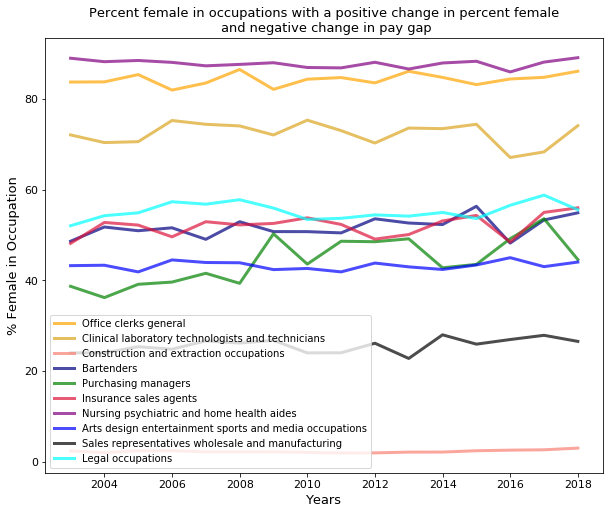

<Figure size 576x432 with 0 Axes>

In [90]:
fig, ax = plt.subplots(figsize=(10,8))

years = range(2003, 2019)
colors = ['orange', 'goldenrod', 'salmon', 'navy', 'green', 'crimson', 'purple', 'blue', 'black', 'cyan']

index = 0
for occ in df_percent_female_pos_pay_gap_neg_sorted.index[:10]:
    percent_female = np.asarray(eval(df_percent_female_pos_pay_gap_neg_sorted.loc[occ]['Percent Female']))[::-1]
    thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    index += 1
    
thinkplot.Config(xlabel='Years', 
                 ylabel='% Female in Occupation', 
                 title='Percent female in occupations with a positive change in percent female\n and negative change in pay gap')
thinkplot.set_font_size(13, 13, 11, 11)

thinkplot.Show()

After plotting, the first ?? occupations, we identify ?? occupations with a positive relationship between percent female and time:
- office clerks general
- bartenders
- purchasing managers
- insurance sales agents
- sales representatives wholesale and manufacturing

The percent females for these occupations are...

For each of the ?? occupations, we make a two-scale plot of pay gap and percent female versus year. 

#### Office clerks general

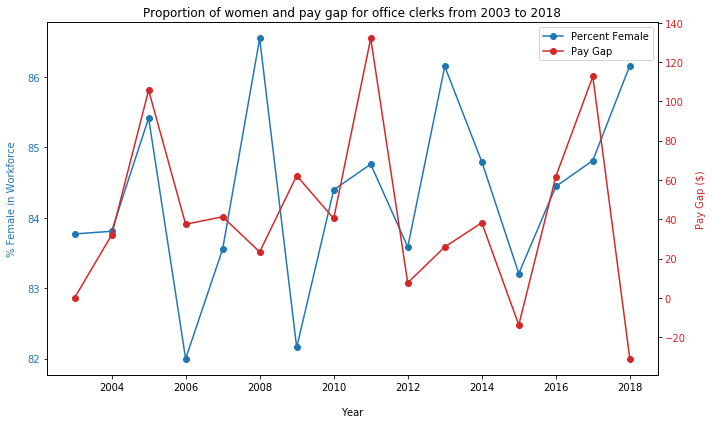

In [91]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Office clerks general']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Office clerks general']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for office clerks from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Bartenders

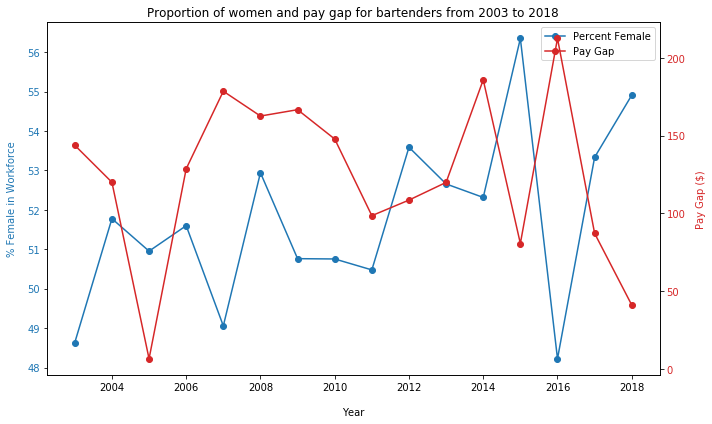

In [92]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Bartenders']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Bartenders']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for bartenders from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Purchasing managers

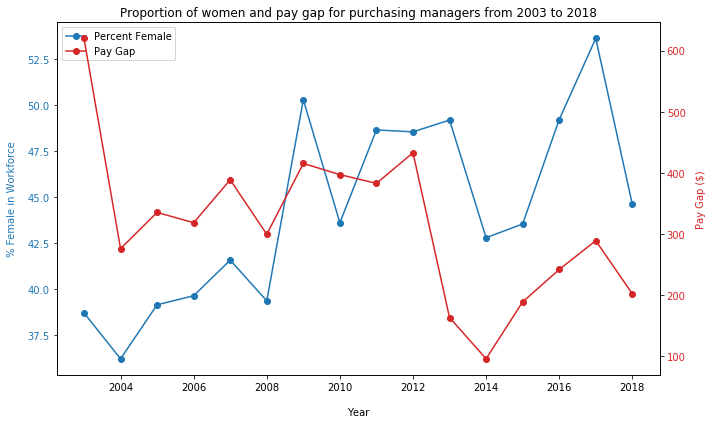

In [93]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Purchasing managers']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Purchasing managers']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for purchasing managers from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Insurance sales agents

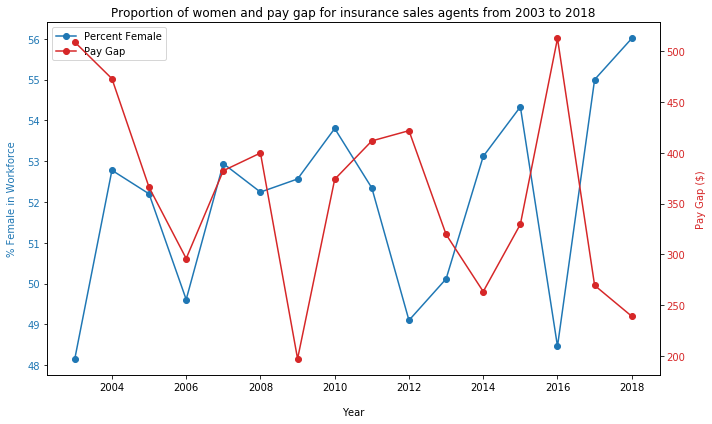

In [95]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Insurance sales agents']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Insurance sales agents']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for insurance sales agents from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Sales representatives wholesale and manufacturing

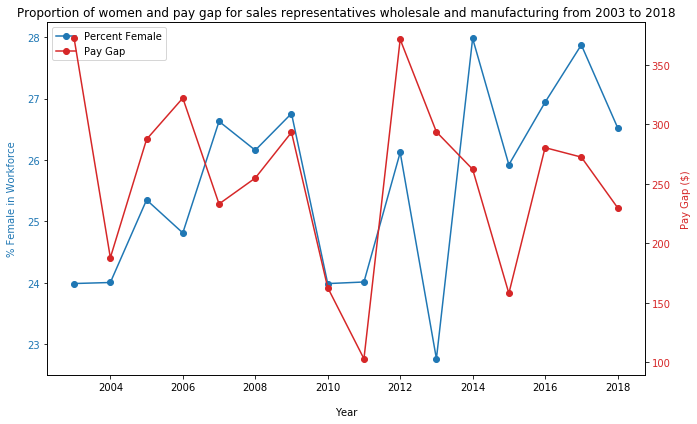

In [96]:
fig, ax_percent_female = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax_percent_female.set_xlabel('Year')
ax_percent_female.xaxis.labelpad = 15
ax_percent_female.set_ylabel('% Female in Workforce', color=color)

years= range(2003, 2019)

# Percent female plot
percent_female = np.asarray(eval(df.loc['Sales representatives wholesale and manufacturing']['Percent Female']))[::-1]
line_percent_female = plt.plot(years, percent_female, label='Percent Female', color=color, marker='o')
ax_percent_female.tick_params(axis='y', labelcolor=color)
ax_percent_female.yaxis.labelpad = 10

ax_pay_gap = ax_percent_female.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax_pay_gap.set_ylabel('Pay Gap ($)', color=color) # we already handled the x-label with ax_percent_female

# Pay gap plot
pay_gap = np.asarray(eval(df.loc['Sales representatives wholesale and manufacturing']['Pay Gap']))[::-1]
line_pay_gap = plt.plot(years, pay_gap, label='Pay Gap', color=color, marker='o')
ax_pay_gap.tick_params(axis='y', labelcolor=color)
ax_pay_gap.yaxis.labelpad = 10

ax_pay_gap.title.set_text('Proportion of women and pay gap for sales representatives wholesale and manufacturing from 2003 to 2018')

lines = line_percent_female + line_pay_gap
labels = [l.get_label() for l in lines]
ax_percent_female.legend(lines, labels)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Occupations with negative percent female change

Instead of just focusing on occupations with positive percent female changes, we create another `DataFrame` that contains all of the occupations with a negative percent female change, which indicates the occupations that women are leaving.

In [98]:
df_percent_female_neg = df[df['Percent Female Change (%)'] < 0]
print('Number of occupations:', df_percent_female_neg.shape[0])
df_percent_female_neg.iloc[:5, -6:]

Number of occupations: 37


,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Computer and information systems managers,-14.884284,-2.108592,-10.179370,-4.451795,-40.430792,-21.872687
Property real estate and community association managers,-4.242424,3.021773,-23.470609,-2.362869,29.859363,-67.777942
Business and financial operations occupations,-3.801174,5.521249,-24.768544,-2.148036,63.625463,-91.526277
Wholesale and retail buyers except farm products,-1.267356,-12.954672,-101.029106,-0.567589,-130.669874,-196.343449
Management analysts,-1.711286,0.392747,-48.349527,-0.764979,5.993338,-191.898594


There is a substantial number. Let's sort them in ascending order of `Relative Percent Female Change (%)`.

In [99]:
df_percent_female_neg_sorted = df_percent_female_neg.sort_values(by=['Relative Percent Female Change (%)'], ascending=True)
df_percent_female_neg_sorted.iloc[:10, -6:]

,Relative Percent Female Change (%),Relative Total Weekly Pay Change (%),Relative Pay Gap Change (%),Percent Female Change (%),Total Weekly Pay Change ($),Pay Gap Change ($)
Occupation,,,,,,
Computer support specialists,-23.582960,5.985531,72.228231,-8.373103,61.275352,41.518135
Advertising sales agents,-23.507262,8.836402,-126.314167,-14.365549,81.027387,-494.424130
Sales representatives services all other,-21.547328,8.803659,198.053537,-7.268357,99.523316,273.769800
Computer programmers,-20.146964,9.153838,11.657996,-5.364334,133.424130,22.656551
Electrical electronics and electromechanical assemblers,-20.024737,0.466468,29.589681,-12.064083,2.809030,42.926721
Installation maintenance and repair occupations,-18.394920,1.402871,79.489501,-0.747519,12.921540,50.043671
Computer and information systems managers,-14.884284,-2.108592,-10.179370,-4.451795,-40.430792,-21.872687
Inspectors testers sorters samplers and weighers,-12.047251,-1.341000,-33.925489,-4.837578,-10.479645,-97.040711
Other teachers and instructors,-10.605457,2.679386,-8.666847,-6.573930,24.972613,-24.197631


There seems to be more engineering occupations in this category!! We plot the first few with percent female against time.

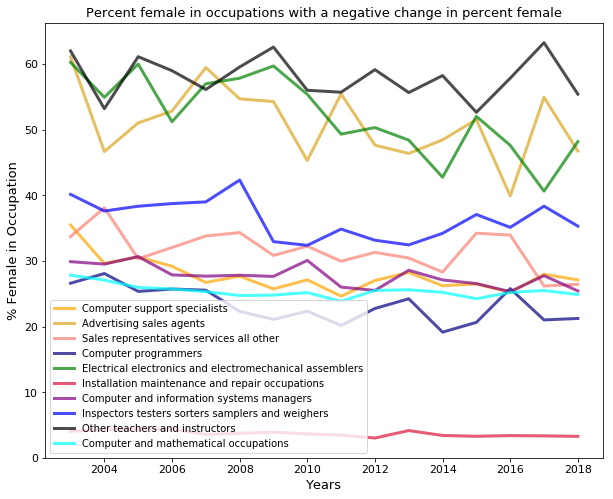

<Figure size 576x432 with 0 Axes>

In [100]:
fig, ax = plt.subplots(figsize=(10,8))

years = range(2003, 2019)
colors = ['orange', 'goldenrod', 'salmon', 'navy', 'green', 'crimson', 'purple', 'blue', 'black', 'cyan']

index = 0
for occ in df_percent_female_neg_sorted.index[:10]:
    percent_female = np.asarray(eval(df_percent_female_neg_sorted.loc[occ]['Percent Female']))[::-1]
    thinkplot.Plot(years, percent_female, label=occ, color=colors[index])
    index += 1
    
thinkplot.Config(xlabel='Years', 
                 ylabel='% Female in Occupation', 
                 title='Percent female in occupations with a negative change in percent female')
thinkplot.set_font_size(13, 13, 11, 11)

thinkplot.Show()

There seems to be more engineering occupations in this category!! A few ones to delve into:
- Computer programmers
- Sales representatives services all other
- Advertising sales agents